
# 625 Spring 2024: Homework 4, Coding

There are five sections below, corresponding to three coding assignments. Implement and test (note that Problem 11 is a no-credit exercise).


# Problem 5 : Infogain



In [ ]:
'''
PROBLEM 5

- implement the functions in this code cell for problem 6.

'''

import math
import numpy as np

#--------------------------
# my_log function: implement this and use it in entropy()
#--------------------------
def my_log(val):
  '''
  implement this
  '''

  # must take care of the val=0 case.
  # - right now it will cause an error when my_log(0) is called.
  if val == 0:
      return 0  # log2(0) is treated as 0
  else:
      return math.log2(val)


#--------------------------
# entropy function: implement this and use it in infogain()
#--------------------------
def entropy(pos_neg):
  '''
  implement this

  input:
  pos_neg is a list  [n, m], where
  n is the number of positive samples, and
  m is the number of negative samples

  returns:
  entropy value

  '''

  pos = pos_neg[0]
  neg = pos_neg[1]
  total = pos + neg

  # Handle cases where pos or neg is 0 to avoid division by zero
  if pos == 0 or neg == 0:
      return 0

  prob_pos = pos / total
  prob_neg = neg / total

  entropy_val = - (prob_pos * my_log(prob_pos) + prob_neg * my_log(prob_neg))
  return entropy_val
  # compute entropy
  # ...
  # ...
  # return ....

#--------------------------
# infogain function: define this and test
#--------------------------
def infogain (before, after):
  '''
  implement this

  input:
    before: [n, m], for pos# and neg#
    after: [[n1, m1], [n2, m2], [n3, m3], ... ],
      for pos# and neg# for the different splits.
    * example:
      before = [6,6]
      after  = [ [0,2], [4,0], [2,4] ]

  returns: infogain value
  '''

  print('infogain()')

  # 1. entropy before split
  entropy_before = entropy(before)
  print("Entropy Before Split:", entropy_before)

  # 2. entropy after split
  entropy_after = 0
  for split in after:
    entropy_after_split = entropy(split)
    print("Entropy After Split:", entropy_after_split)
    entropy_after += (sum(split) / sum(before)) * entropy_after_split

  # 3. compute infogaion from 1 and 2 above
  information_gain = entropy_before - entropy_after

  # 4. return
  return information_gain

#--------------------------
# test entropy
#--------------------------
print(entropy([10,10]))
print(entropy([2,5]))

#--------------------------
# test infogain
#--------------------------
pre = [6,6]
post  = [ [0,2], [4,0], [2,4] ]
print('\n\n')
print("Information Gain:",infogain(pre, post))

1.0
0.863120568566631



infogain()
Entropy Before Split: 1.0
Entropy After Split: 0
Entropy After Split: 0
Entropy After Split: 0.9182958340544896
Information Gain: 0.5408520829727552


In [ ]:
# Add your test code here, for the homework questions
pre = [6,8]
postA  = [ [4,3], [2,5] ]
print('\n\n')
print("Information Gain for A:", infogain(pre, postA))


postB  = [  [4,0], [2,8] ]
print('\n\n')
print("Information Gain for B:", infogain(pre, postB))

postD  = [ [4,2], [2,6] ]
print('\n\n')
print("Information Gain for D:", infogain(pre, postD))





infogain()
Entropy Before Split: 0.9852281360342515
Entropy After Split: 0.9852281360342515
Entropy After Split: 0.863120568566631
Information Gain for A: 0.06105378373381021



infogain()
Entropy Before Split: 0.9852281360342515
Entropy After Split: 0
Entropy After Split: 0.7219280948873623
Information Gain for B: 0.46956521111470695



infogain()
Entropy Before Split: 0.9852281360342515
Entropy After Split: 0.9182958340544896
Entropy After Split: 0.8112781244591328
Information Gain for D: 0.12808527889139443


# Problem 6 : Decision Tree


[Text(0.4, 0.875, 'x[1] <= 0.5\nentropy = 0.985\nsamples = 14\nvalue = [8, 6]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.625, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 10\nvalue = [8, 2]'),
 Text(0.4, 0.375, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]')]

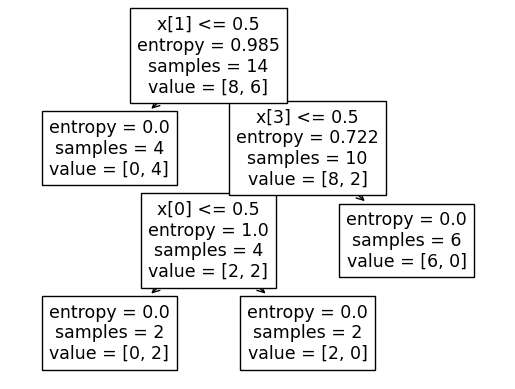

In [ ]:
# Testing scikit-learn's decision tree implementation.
#
#  - scikit-learn's decision tree only allows binary target values.

from sklearn import tree
import numpy as np

clf = tree.DecisionTreeClassifier(criterion="entropy")

# Enter your data here. Each row is an instance. Each column is the attribute.
# Set the first attribute value that appears in the table to be 0, and the next one as 1.
# - for example, for the Commute attribute, 2hr = 0, and 1hr = 1.
#
# X = [[0,0,0,0],
#      [0,0,0,1],
#      ... .... ... ]
#

# mock data, with only 4 instances
# - MODIFY this
#
# Column order: A, B, C, D, E
# Values:         0, 1, as shown in the table.
# Target:         N=0, Y=1
data = {
    'A': [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1],
    'B': [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1],
    'C': [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0],
    'D': [0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1],
    'E': [0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0],
    'T': ['N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N']
}

# Enter the target data (AcceptJob) here. 1 = Yes. 0 = No.
# y = [1, 1, .... ]
# - MODIFY this

# Creating NumPy arrays for X and y
X = np.array(list(zip(data['A'], data['B'], data['C'], data['D'], data['E'])))
y = np.array([1 if label == 'Y' else 0 for label in data['T']])

clf = clf.fit(X, y)

# Note: value=[a,b] means "a" negative samples, and "b" positive samples [# neg = a, # pos = b].
#       *Note that this order is reversed, compared to the lecture slides, where we had [# pos, #neg], so you have to be careful.
# Note: left branch is attribute value 0, right branch = attribute value 1.
# Note: X[n] means the attribute for the n-th column (n=0 is the first column in),
#       so, for the homework problem, X[0] is "A". X[1] is "B"", etc.

# Note: You can use some optional arguments to match each column to an attribute name, and indicate the class.
#   - feature_names = <python list>
#   - class_names = <puython list>
tree.plot_tree(clf)

# Check if the tree gives the correct answer for the mock dataset above.


In [ ]:
# 1st Novel input
X_test1 = [[1,1,1,1,1]]
test1_output = clf.predict(X_test1)
print(test1_output)

#2nd Novel input
X_test2 = [[0,0,0,0,0]]
test2_output = clf.predict(X_test2)
print(test2_output)

[0]
[1]


# Problem 7 : Perceptron



Input (with bias at the end)=[ 1.  1. -1.], Target=1
Input (with bias at the end)=[ 0.  1. -1.], Target=1
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 1.  0. -1.], Target=1
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Target=1
Input (with bias at the end)=[ 1.  1. -1.], Target=1
Input (with bias at the end)=[ 1.  0. -1.], Target=1
Input (with bias at the end)=[ 1.  0. -1.], Target=1
Input (with bias at the end)=[ 1.  1. -1.], Target=1
Input (with bias at the end)=[ 0.  1. -1.], Target=1
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 1.  0. -1.], Target=1
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Target=1
Input (with bias at the end)=[ 1.  1. -1.], Target=1
Input (with bias at the end)=[ 1.  1. -1.], Target=1
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Ta

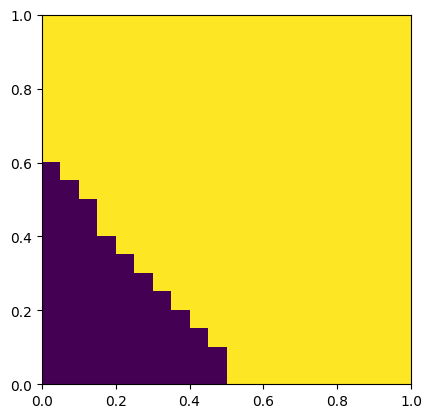

In [ ]:
'''
Implement perceptron in this code cell : implement the perceptron() function

Assumptions: 2 input, 1 output perceptron.
  Note: 1 bias unit should also be added to the input vector  (fixed value of 1.0).
        This is already done in the skeleton code.
'''

import matplotlib.pyplot as plt
import random
import numpy as np
import math

# example data: AND
# -input  : [x,y] values
# -target : target values
'''
  implement this:
     add more samples, for OR, XOR, etc.
'''
#OR
input  = np.array(
          [[0,0],
          [0,1],
          [1,0],
          [1,1]])
target = np.array([
          0,
          1,
          1,
          1])

BIAS = -1.0

#-----------------------------
# plot decision boundary function
#-----------------------------
def plot_decision_boundary(W):
  '''
  plot the decision boundary for weight vector W
  - fully functional
  '''

  x = np.arange(0.0, 1.0, 0.05)
  y = np.arange(1.0, 0.0, -0.05)

  xx, yy = np.meshgrid(x, y)

  output = W[0]*xx + W[1]*yy + W[2]*BIAS

  fig, ax = plt.subplots(1,1)

  ax.imshow(output>=0.0, extent=[0,1,0,1])

#-----------------------------
# perceptron function: implement this
#-----------------------------
def perceptron(inp, tgt, alpha=0.01, err_target=0.001):
  '''
  implement this

  input:
    inp : input vector array
    tgt : target output array
    alpha : learning rate, default = 0.01
    err_target : target error below which to terminate

  output: print out #epochs, error, and plot the decision boundary

  returns: Weight vector
  '''

  # compute some common sizes
  num_dat = len(tgt)
  inp_dim = len(inp[0])+1        # "+1" to add bias unit

  # add bias to input vectors
  inp = np.append(inp, BIAS*np.ones([num_dat,1]), axis=1)

  # initialize weight vector : -0.5 ~ 0.5
  W = (np.random.rand(inp_dim)-0.5)

  n = 0
  error = math.inf
  while error > err_target:

    #--------------
    # epoch
    #--------------

    # randomize input ordering
    order = np.arange(num_dat)
    np.random.shuffle(order)

    # 1. go over each input

    total_error = 0.0

    for i in order:

      print("Input (with bias at the end)=", end='')
      print(inp[i], end=', Target=')
      print(tgt[i])

      # 1.1. activate output unit
      output = 1.0 if np.dot(W, inp[i]) > 0 else 0.0

      # 1.2. compute error
      delta = tgt[i] - output

      # 1.3. adjust weight, based on the error
      W += alpha * delta * inp[i]

      # 1.4. keep sum of total_error during this epoch
      # total_error = total_error + absolute value of error from 1.2
      total_error += abs(delta)

    # 2. compute error for the epoch as the mean error from the current epoch
    # error = total_error / number of samples
    error = total_error / num_dat

    # increment epoch count
    n = n + 1
    if(n > 100):
      print("Can't train the model")
      return

    # forcefully quit, for now
    #error = 0.00001

  # Done with training
  print('number of epochs = '+str(n))
  print('average error = '+str(error))

  # return weight vector
  return W

#-----------------------------
# test perceptron
#-----------------------------
W = perceptron(input, target, 0.1, 0.001)

#-----------------------------
# test decision boundary plot: white = 1, black = 0
# - Note: if you get totally white of totally black, try
#     rerunnning (sometimes more than 10 times) to get a non-trivial result.
#-----------------------------
print('\n\nTesting plot_decision_boundary')
print(W)
plot_decision_boundary(W)


In [ ]:
# Testing
inp = np.append(input, BIAS*np.ones([4,1]), axis=1)

np.dot(W,inp[0])
print("W=",W)
print("inp[0]=",inp[0])

W= [0.10806667 0.09479899 0.05876826]
inp[0]= [ 0.  0. -1.]


Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Target=0
Input (with bias at the end)=[ 1.  1. -1.], Target=1
Input (with bias at the end)=[ 1.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Target=0
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 1.  1. -1.], Target=1
Input (with bias at the end)=[ 1.  0. -1.], Target=0
Input (with bias at the end)=[ 1.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Target=0
Input (with bias at the end)=[ 1.  1. -1.], Target=1
Input (with bias at the end)=[ 1.  0. -1.], Target=0
Input (with bias at the end)=[ 1.  1. -1.], Target=1
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Target=0
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Target=0
Input (with bias at the end)=[ 1.  0. -1.], Ta

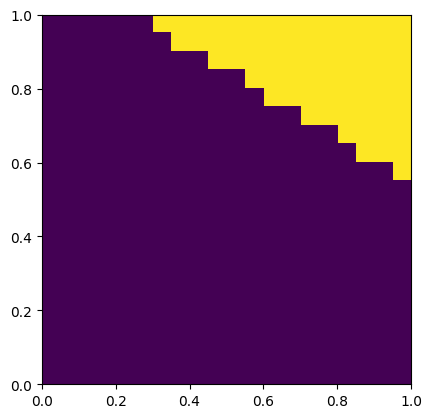

In [ ]:
# Add your test code here, for the homework questions
# AND
inputAnd  = np.array(
          [[0,0],
          [0,1],
          [1,0],
          [1,1]])
targetAnd = np.array([
          0,
          0,
          0,
          1])
WAnd = perceptron(inputAnd, targetAnd, 0.1, 0.001)
print(WAnd)
plot_decision_boundary(WAnd)

In [ ]:
# Add your test code here, for the homework questions
# XOR
inputAnd  = np.array(
          [[0,0],
          [0,1],
          [1,0],
          [1,1]])
targetAnd = np.array([
          0,
          1,
          1,
          0])
WAnd = perceptron(inputAnd, targetAnd, 0.1, 0.001)

Input (with bias at the end)=[ 0.  1. -1.], Target=1
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 1.  0. -1.], Target=1
Input (with bias at the end)=[ 1.  1. -1.], Target=0
Input (with bias at the end)=[ 1.  0. -1.], Target=1
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Target=1
Input (with bias at the end)=[ 1.  1. -1.], Target=0
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 1.  0. -1.], Target=1
Input (with bias at the end)=[ 1.  1. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Target=1
Input (with bias at the end)=[ 0.  0. -1.], Target=0
Input (with bias at the end)=[ 1.  0. -1.], Target=1
Input (with bias at the end)=[ 0.  1. -1.], Target=1
Input (with bias at the end)=[ 1.  1. -1.], Target=0
Input (with bias at the end)=[ 1.  0. -1.], Target=1
Input (with bias at the end)=[ 1.  1. -1.], Target=0
Input (with bias at the end)=[ 0.  1. -1.], Ta




# Problem 10: Gradient Descent





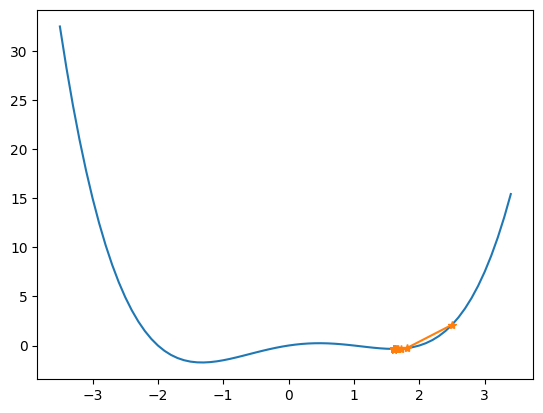

In [ ]:
# Implement your program here:

# Example program. You can modity/extend this.
#
# 1. define error function
# - this is an example (quadratic function) -- you should change it to the function given in the homework.
# - also, you need to check for the termination condition (absolute value of deltaE in current vs. previous step < 0.001, etc.), rather than using a fixed number of steps.
def E(w):
  '''
  implement this
  '''
  return ((w * (w-2) * (w-1) * (w+2))/4)     # note: np.power() can take scalar or vector as argument.

# 2. define derivative function
def dEdw(w):
  '''
  implement this
  '''
  return (np.power(w,3) - (3/4)* np.power(w,2) - 2 * w + 1)

# 3. gradient descent

w = 2.5     # initial value
alpha = 0.1   # learning rate  ; try eta=0.01 and eta=0.01

n = 100   # Try changing this depending on the alpha value.

w_t = np.zeros(n)   # this is w at step t
Ew_t = np.zeros(n)  # this is E(w) at step t

for i in range(n): # you can consider using a while loop
  '''
  implement this loop : exit when absolute value of deltaE is < small value (e.g. 0.001)
  - be careful with plotting, since if you terminate early,
    zeros in the w_t[] and Ew_t[] list would lead to a weird plot.
  '''
  w_t[i]=w
  Ew_t[i]=E(w)


  # implement this: gradient descent step
  #
  # delta_w = ...
  # w = ..... delta_w ...

  delta = dEdw(w) * alpha
  w = w - delta

  # implement this: check for convergence and exit loop
  #
  # if np.abs(delta_w) is below a small threshold (say 0.001), stop.
  #

# 4. plot E(w) and the gradient descent steps

# Note: adjust the range below based on the function you're given in problem 10.
#  - right now the x axis in the plot is 0 to 5 with a step size of 0.1.
x = np.arange(-3.5,3.5,0.1)

# If loop ended earlier than n steps, then plotting the entire array can
# give strange results (jumping to [0,0]). Fix this.
plt.plot(x,E(x),"-",w_t,Ew_t,"*-")

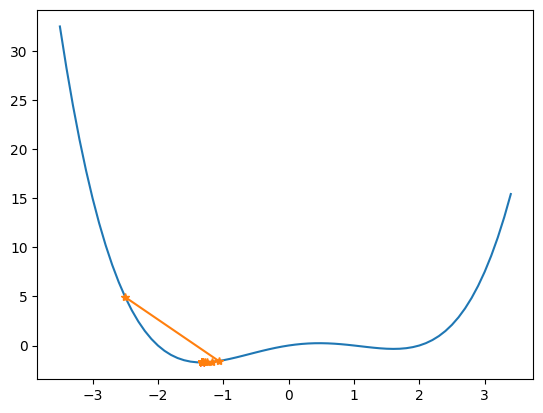

In [ ]:
# Implement your program here:

# Example program. You can modity/extend this.
#
# 1. define error function
# - this is an example (quadratic function) -- you should change it to the function given in the homework.
# - also, you need to check for the termination condition (absolute value of deltaE in current vs. previous step < 0.001, etc.), rather than using a fixed number of steps.
def E(w):
  '''
  implement this
  '''
  return ((w * (w-2) * (w-1) * (w+2))/4)     # note: np.power() can take scalar or vector as argument.

# 2. define derivative function
def dEdw(w):
  '''
  implement this
  '''
  return (np.power(w,3) - (3/4)* np.power(w,2) - 2 * w + 1)

# 3. gradient descent

w = -2.5     # initial w value
alpha = 0.1   # learning rate  ; try alpha=0.1, alpha=0.01, and alpha=0.001

n = 100   # Try changing this depending on the alpha value.

w_t = np.zeros(n)   # this is w at step t
Ew_t = np.zeros(n)  # this is E(w) at step t

for i in range(n): # you can consider using a while loop
  '''
  implement this loop : exit when absolute value of deltaE is < small value (e.g. 0.001)
  - be careful with plotting, since if you terminate early,
    zeros in the w_t[] and Ew_t[] list would lead to a weird plot.
  '''
  w_t[i]=w
  Ew_t[i]=E(w)


  # implement this: gradient descent step
  #
  # delta_w = ...
  # w = ..... delta_w ...

  delta = dEdw(w) * alpha
  w = w - delta

  # implement this: check for convergence and exit loop
  #
  # if np.abs(delta_w) is below a small threshold (say 0.001), stop.
  #

# 4. plot E(w) and the gradient descent steps

# Note: adjust the range below based on the function you're given in problem 10.
#  - right now the x axis in the plot is 0 to 5 with a step size of 0.1.
x = np.arange(-3.5,3.5,0.1)

# If loop ended earlier than n steps, then plotting the entire array can
# give strange results (jumping to [0,0]). Fix this.
plt.plot(x,E(x),"-",w_t,Ew_t,"*-")


# Problem 11 : CNN

In [ ]:
'''

Put your CNN code and results here. Use a separate code cell for the sub tasks.

Prompt -
Generate code for CNN variant LeNet and train it on MNIST handwritten data set.
Use 2 conv layers and the make the receptive field size to be 5*5.
With 25 channels for each conv layer, use different learning parameters such as number of epoch, batch size to get an accuracy of 99%

'''

# Chatgpt chat link https://chat.openai.com/share/72ddf349-e076-44e2-aea7-fed3fe8b9ec1

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channel dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Define LeNet architecture
model = models.Sequential([
    layers.Conv2D(25, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(25, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)



11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/15
469/469 [==============================] - 45s 94ms/step - loss: 0.2496 - accuracy: 0.9232 - val_loss: 0.0646 - val_accuracy: 0.9795
Epoch 2/15
469/469 [==============================] - 40s 86ms/step - loss: 0.0665 - accuracy: 0.9796 - val_loss: 0.0439 - val_accuracy: 0.9864
Epoch 3/15
469/469 [==============================] - 39s 84ms/step - loss: 0.0459 - accuracy: 0.9854 - val_loss: 0.0391 - val_accuracy: 0.9884
Epoch 4/15
469/469 [==============================] - 41s 87ms/step - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0426 - val_accuracy: 0.9855
Epoch 5/15
469/469 [==============================] - 40s 85ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0315 - val_accuracy: 0.9909
Epoch 6/15
469/469 [==============================] - 40s 85ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0317 - val_accuracy: 0.9905
Epoch 7/15
469/469 [==============================] - 38s 82ms/step - l

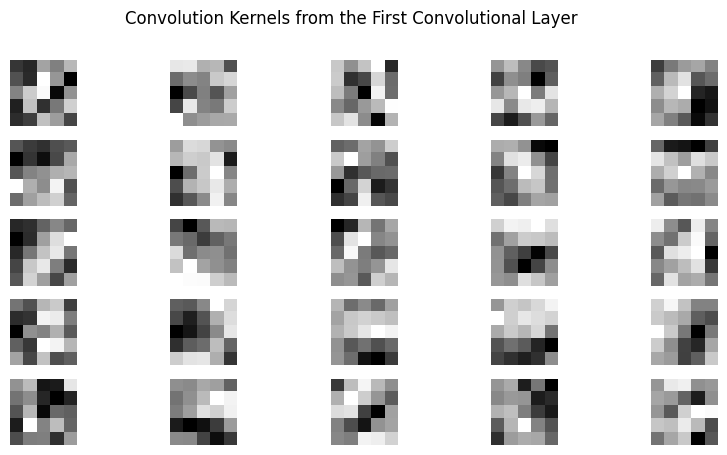

In [ ]:
'''
Prompt - Plot the convolution kernels from the first conv layer

'''

import matplotlib.pyplot as plt

# Get the weights of the first convolutional layer
conv1_weights = model.layers[0].get_weights()[0]

# Normalize the weights to [0, 1] for visualization
conv1_weights_normalized = (conv1_weights - np.min(conv1_weights)) / (np.max(conv1_weights) - np.min(conv1_weights))

# Plot the convolution kernels
plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(conv1_weights_normalized[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Convolution Kernels from the First Convolutional Layer')
plt.show()


1/1 [==============================] - 0s 117ms/step


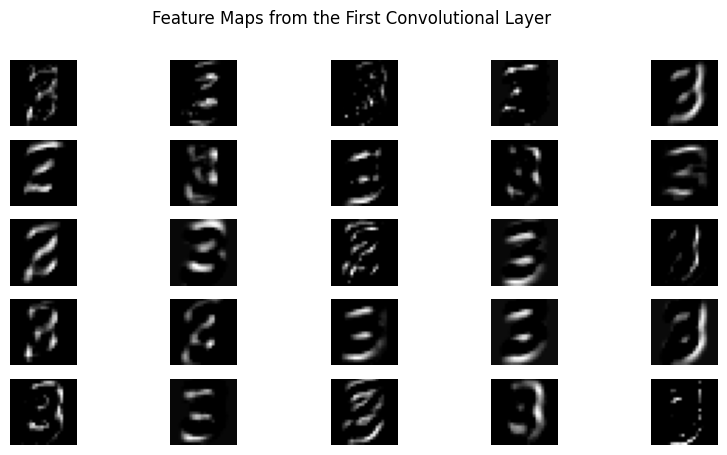

In [ ]:
'''
Prompt -
Plot the featuremaps from first conv layer. Pick an input in the category “3” and show the plot. Use the “gray” colormap.

'''

import matplotlib.pyplot as plt

# Create a model to get activations of the first convolutional layer
activation_model = models.Model(inputs=model.input, outputs=model.layers[0].output)

# Select a random image of the category "3" from the test set
category_3_indices = np.where(y_test == 3)[0]
selected_image_index = np.random.choice(category_3_indices)
selected_image = x_test[selected_image_index]

# Get the activations of the first convolutional layer for the selected image
activations = activation_model.predict(np.expand_dims(selected_image, axis=0))

# Plot the feature maps
plt.figure(figsize=(10, 5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(activations[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Feature Maps from the First Convolutional Layer')
plt.show()
